In [3]:
!pip install fastparquet --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.5 MB/s eta 0:00:00


In [2]:
!file /content/news_with_embeddings_1yr.parquet
!head -c 16 /content/news_with_embeddings_1yr.parquet
!tail -c 16 /content/news_with_embeddings_1yr.parquet

/content/news_with_embeddings_1yr.parquet: Apache Parquet
PAR1��;��L      �  PAR1

In [4]:
!tail -c 16 /content/news_with_embeddings_1yr.parquet


      �  PAR1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

news = pd.read_parquet(
    "/content/news_with_embeddings_1yr.parquet",
    engine="fastparquet"
)

news.head()

url  \
0  https://newsday.co.tt/2024/11/27/cops-kill-two...   
1  https://newsday.co.tt/2024/11/27/7-cops-on-mis...   
2  https://newsday.co.tt/2024/11/27/indarsingh-fo...   
3  https://newsday.co.tt/2024/11/27/mark-wants-an...   
4  https://newsday.co.tt/2024/11/27/education-min...   

                                               title           author  \
0   Cops kill two suspected car thieves in Marabella      Yvonne Webb   
1  7 cops on misbehaviour charge to reappear in c...      Jada Loutoo   
2  Indarsingh: 'Follow health, safety rules for r...      Yvonne Webb   
3  Mark wants answers on sale of Clico's methanol...     Sean Douglas   
4   Education Minister: No 'unsafe' schools reopened  Clint Chan Tack   

  category   date_iso                                               body  \
0     News 2024-11-27  MARABELLA police shot and killed two suspected...   
1     News 2024-11-27  A HIGH COURT Master has issued summonses for t...   
2     News 2024-11-27  COUVA South MP Rudranath Indarsingh has expres...   
3     News 2024-11-27  OPPOSITION Senator Wade Mark demanded document...   
4     News 2024-11-27  EDUCATION Minister Dr Nyan Gadsby-Dolly says t...   

  date_from_url                                          embedding  
0    2024-11-27  [0.6208990216255188, -0.35742926597595215, -3....  
1    2024-11-27  [1.4730515480041504, 0.5825498700141907, -2.73...  
2    2024-11-27  [-0.2633245289325714, 0.5250070691108704, -3.1...  
3    2024-11-27  [0.8361741304397583, 0.5199176669120789, -2.67...  
4    2024-11-27  [-0.16641904413700104, 0.5341360569000244, -3....

In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   url            5480 non-null   object        
 1   title          5480 non-null   object        
 2   author         5480 non-null   object        
 3   category       5480 non-null   object        
 4   date_iso       5480 non-null   datetime64[ns]
 5   body           5480 non-null   object        
 6   date_from_url  5479 non-null   datetime64[ns]
 7   embedding      5480 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 342.6+ KB


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.cluster import KMeans
# import umap
# import matplotlib.pyplot as plt

# # --- Load your data ---
# df = pd.read_parquet("/content/news_with_embeddings_1yr.parquet")
# print(f"Loaded {len(df)} articles.")

# # Convert embeddings from object to numpy array
# emb_matrix = np.vstack(df['embedding'].to_numpy())

# # ---------------------------
# # 1. Semantic Search Example
# # ---------------------------
# # Pick an article (e.g., first article) to search for similar ones
# query_index = 0
# query_emb = emb_matrix[query_index]

# similarities = cosine_similarity([query_emb], emb_matrix)[0]
# df['similarity'] = similarities

# top_matches = df.sort_values('similarity', ascending=False).head(5)
# print("\nTop 5 similar articles to the first article:")
# print(top_matches[['title', 'similarity']])

# # ---------------------------
# # 2. Clustering / Topic Discovery
# # ---------------------------
# num_clusters = 10  # adjust as needed
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# df['cluster'] = kmeans.fit_predict(emb_matrix)

# print("\nCluster distribution:")
# print(df['cluster'].value_counts())

# # Optional: check top articles per cluster
# for i in range(num_clusters):
#     print(f"\nCluster {i} example articles:")
#     print(df[df['cluster']==i]['title'].head(3).tolist())

# # ---------------------------
# # 3. Visualization (UMAP 2D)
# # ---------------------------
# reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
# embedding_2d = reducer.fit_transform(emb_matrix)

# plt.figure(figsize=(12,8))
# scatter = plt.scatter(
#     embedding_2d[:,0], embedding_2d[:,1],
#     c=df['cluster'], cmap='tab10', s=10
# )
# plt.colorbar(scatter, label='Cluster')
# plt.title("UMAP Projection of News Article Embeddings")
# plt.xlabel("UMAP 1")
# plt.ylabel("UMAP 2")
# plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt

# --- Load your data ---
df = pd.read_parquet(
    "/content/news_with_embeddings_1yr.parquet",
    engine="fastparquet"
)

# Convert embeddings from object to numpy array
emb_matrix = np.vstack(df['embedding'].to_numpy())

# ---------------------------
# 1. Semantic Search Example
# ---------------------------
# Pick an article (e.g., first article) to search for similar ones
query_index = 0
query_emb = emb_matrix[query_index]

similarities = cosine_similarity([query_emb], emb_matrix)[0]
df['similarity'] = similarities

top_matches = df.sort_values('similarity', ascending=False).head(5)
print("\nTop 5 similar articles to the first article:")
print(top_matches[['title', 'similarity']])



Top 5 similar articles to the first article:
                                                  title  similarity
0      Cops kill two suspected car thieves in Marabella    1.000000
32    Police kill one, wound another in separate sho...    0.839547
3290  Shootout between men and police leave 1 dead, ...    0.830608
3279         Second man dead after shootout with police    0.816351
2896  Investigations ongoing into murders of sailor,...    0.800276


In [5]:
# ---------------------------
# 2. Clustering / Topic Discovery
# ---------------------------
num_clusters = 10  # adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(emb_matrix)

print("\nCluster distribution:")
print(df['cluster'].value_counts())

# Optional: check top articles per cluster
for i in range(num_clusters):
    print(f"\nCluster {i} example articles:")
    print(df[df['cluster']==i]['title'].head(3).tolist())


Cluster distribution:
cluster
8    871
5    766
6    691
2    658
4    657
1    640
7    483
9    394
3    260
0     60
Name: count, dtype: int64

Cluster 0 example articles:
["Naparima MP blasts PM's Barbados trip", 'Minister celebrates first Boxing Day baby', 'Israel Khan: SoE announced too early, criminals tipped off']

Cluster 1 example articles:
['7 cops on misbehaviour charge to reappear in court in February 2025', "Mark wants answers on sale of Clico's methanol shares", 'Ex-licensing officers acquitted of corruption charges after 24 years']

Cluster 2 example articles:
['Education Ministry: No need for police in schools', "Government slams Kamla's threat to deport Venezuelans", "PM orders AG to probe Tobago Registrar General's Dept issues"]

Cluster 3 example articles:
['Barrackpore man on $300k bail for chopping', 'Point Fortin gym instructor on 2 sex charges', 'Tunapuna mechanic to get $78k for wrongful arrest, imprisonment']

Cluster 4 example articles:
["Indarsingh: 'Follow

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


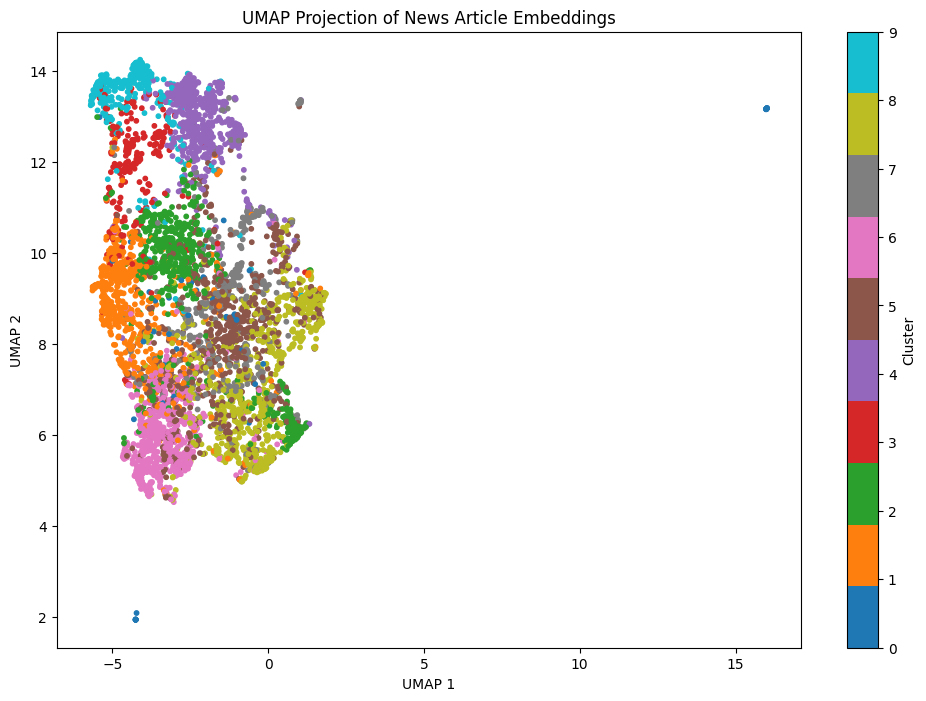

In [6]:
# ---------------------------
# 3. Visualization (UMAP 2D)
# ---------------------------
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding_2d = reducer.fit_transform(emb_matrix)

plt.figure(figsize=(12,8))
scatter = plt.scatter(
    embedding_2d[:,0], embedding_2d[:,1],
    c=df['cluster'], cmap='tab10', s=10
)
plt.colorbar(scatter, label='Cluster')
plt.title("UMAP Projection of News Article Embeddings")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import umap
from sklearn.cluster import KMeans

# Suppose 'df' is your DataFrame and 'embedding' column has embeddings as lists
emb_matrix = np.vstack(df['embedding'].values)

# Reduce to 3D using UMAP
umap_3d = umap.UMAP(n_components=3, random_state=42)
embedding_3d = umap_3d.fit_transform(emb_matrix)

# Cluster into 9 clusters
kmeans = KMeans(n_clusters=9, random_state=42)
labels = kmeans.fit_predict(embedding_3d)

# Prepare DataFrame for plotting
df_plot = pd.DataFrame(embedding_3d, columns=['x', 'y', 'z'])
df_plot['cluster'] = labels.astype(str)  # string for Plotly discrete colors

# Define 9 custom colors (or pick any palette)
color_map = {
    '0': 'red',
    '1': 'blue',
    '2': 'green',
    '3': 'orange',
    '4': 'purple',
    '5': 'pink',
    '6': 'brown',
    '7': 'cyan',
    '8': 'magenta'
}

# Create interactive 3D scatter plot
fig = px.scatter_3d(
    df_plot,
    x='x', y='y', z='z',
    color='cluster',
    color_discrete_map=color_map,
    size_max=5,
    opacity=0.8,
    title="3D UMAP of News Embeddings (9 clusters)"
)
fig.show()


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [52]:
import pandas as pd
import numpy as np
import plotly.express as px
import umap
from sklearn.cluster import KMeans

# Suppose 'df' is your DataFrame and 'embedding' column has embeddings as lists
emb_matrix = np.vstack(df['embedding'].values)

# Reduce to 3D using UMAP
umap_3d = umap.UMAP(n_components=3, random_state=42)
embedding_3d = umap_3d.fit_transform(emb_matrix)

# Cluster into 9 clusters
kmeans = KMeans(n_clusters=9, random_state=42)
labels = kmeans.fit_predict(embedding_3d)

# Prepare DataFrame for plotting
df_plot = pd.DataFrame(embedding_3d, columns=['x', 'y', 'z'])
df_plot['cluster'] = labels.astype(str)  # string for Plotly discrete colors

# Define 9 custom colors (or pick any palette)
color_map = {
    '0': 'red',
    '1': 'blue',
    '2': 'green',
    '3': 'orange',
    '4': 'purple',
    '5': 'pink',
    '6': 'brown',
    '7': 'cyan',
    '8': 'magenta'
}

# Create interactive 3D scatter plot
fig = px.scatter_3d(
    df_plot,
    x='x', y='y', z='z',
    color='cluster',
    color_discrete_map=color_map,
    size_max=5,
    opacity=0.8,
    title="3D UMAP of News Embeddings (9 clusters)"
)

# Set black background
fig.update_layout(
    paper_bgcolor='black',  # background around the plot
    plot_bgcolor='black',   # background inside plot area
    scene=dict(
        # xaxis=dict(backgroundcolor="black", color="white"),
        # yaxis=dict(backgroundcolor="black", color="white"),
        # zaxis=dict(backgroundcolor="black", color="white")
        xaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False), # to hide gridlines
        yaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False),
        zaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False),
    ),
    font=dict(color='white')  # axis and title text color
)

fig.show()


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



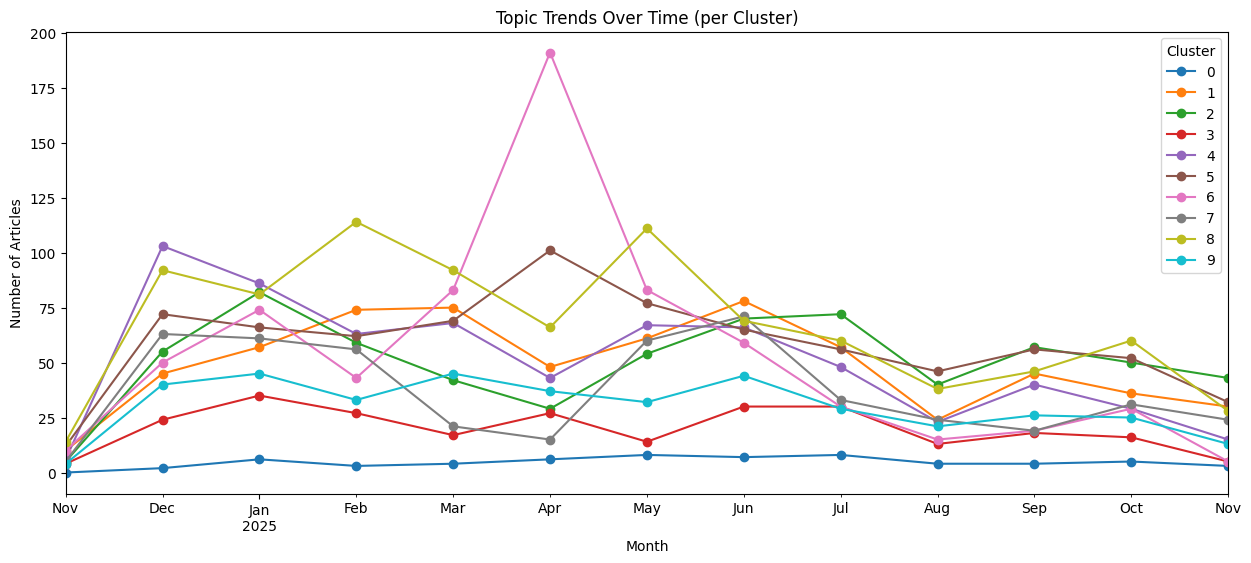

In [21]:
# Ensure date column is datetime
df['month'] = df['date_iso'].dt.to_period('M')

# Count articles per cluster per month
trend_df = df.groupby(['month', 'cluster']).size().reset_index(name='count')

# Pivot for plotting
trend_pivot = trend_df.pivot(index='month', columns='cluster', values='count').fillna(0)

# Plot
trend_pivot.plot(figsize=(15,6), marker='o')
plt.title("Topic Trends Over Time (per Cluster)")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.legend(title="Cluster")
plt.show()


In [53]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import umap
from sklearn.cluster import KMeans
import plotly.express as px

# Convert embeddings to matrix
emb_matrix = np.vstack(df['embedding'].values)

# Compute distance from mean
mean_vec = np.mean(emb_matrix, axis=0)
distances = cdist(emb_matrix, mean_vec.reshape(1, -1))

# Remove top 1% furthest points
threshold = np.percentile(distances, 99)
df_filtered = df[distances[:,0] <= threshold].copy()
emb_filtered = emb_matrix[distances[:,0] <= threshold]

print(f"Original size: {len(df)}, After removing outliers: {len(df_filtered)}")

# 3D UMAP
umap_3d = umap.UMAP(n_components=3, random_state=42)
embedding_3d = umap_3d.fit_transform(emb_filtered)

# Cluster into 9 clusters
kmeans = KMeans(n_clusters=9, random_state=42)
labels = kmeans.fit_predict(embedding_3d)

# Prepare DataFrame for plotting
df_plot = pd.DataFrame(embedding_3d, columns=['x', 'y', 'z'])
df_plot['cluster'] = labels.astype(str)

# Custom colors
color_map = {str(i): px.colors.qualitative.Plotly[i] for i in range(9)}

# 3D scatter plot
fig = px.scatter_3d(
    df_plot, x='x', y='y', z='z',
    color='cluster',
    color_discrete_map=color_map,
    opacity=0.8,
    title="3D UMAP (Outliers Removed)",
)
fig.update_layout(scene=dict(
    # xaxis=dict(backgroundcolor="black"),
    # yaxis=dict(backgroundcolor="black"),
    # zaxis=dict(backgroundcolor="black")
    xaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False), # to hide gridlines
    yaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False),
    zaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False),
))
fig.show()


Original size: 5480, After removing outliers: 5425


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [54]:
from sklearn.preprocessing import StandardScaler

# Standard scale embeddings (zero mean, unit variance)
scaler = StandardScaler()
emb_scaled = scaler.fit_transform(emb_matrix)

# 3D UMAP
umap_3d = umap.UMAP(n_components=3, random_state=42)
embedding_3d_scaled = umap_3d.fit_transform(emb_scaled)

# Cluster into 9 clusters
kmeans = KMeans(n_clusters=9, random_state=42)
labels_scaled = kmeans.fit_predict(embedding_3d_scaled)

# Prepare DataFrame for plotting
df_plot_scaled = pd.DataFrame(embedding_3d_scaled, columns=['x', 'y', 'z'])
df_plot_scaled['cluster'] = labels_scaled.astype(str)

# 3D scatter plot
fig_scaled = px.scatter_3d(
    df_plot_scaled, x='x', y='y', z='z',
    color='cluster',
    color_discrete_map=color_map,
    opacity=0.8,
    title="3D UMAP (Scaled Embeddings)",
)
fig_scaled.update_layout(scene=dict(
    # xaxis=dict(backgroundcolor="black"),
    # yaxis=dict(backgroundcolor="black"),
    # zaxis=dict(backgroundcolor="black")
    xaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False), # to hide gridlines
    yaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False),
    zaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False),
))
fig_scaled.show()


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



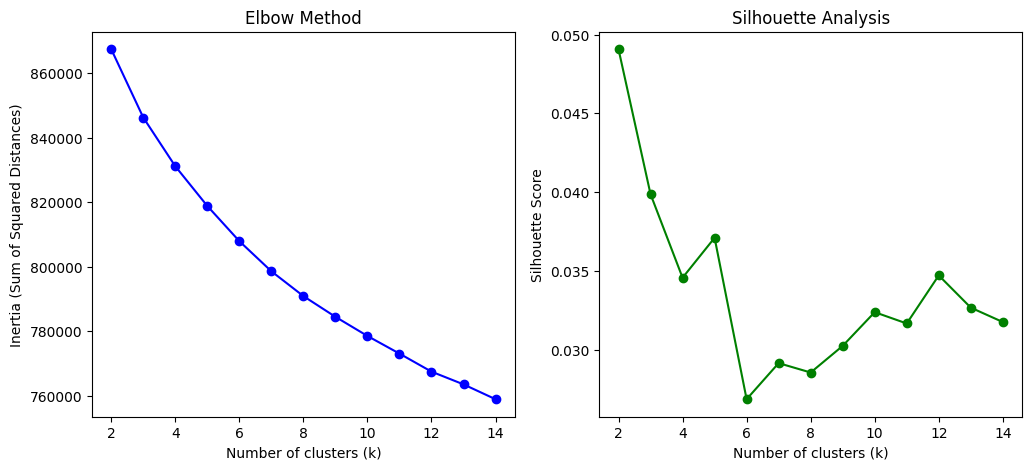

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Suppose 'df' is your DataFrame and 'embedding' column has embeddings as lists
emb_matrix = np.vstack(df['embedding'].values)

# Range of k values to try
k_values = range(2, 15)

# Store metrics
inertia = []           # for elbow method
silhouette_scores = [] # for silhouette analysis

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(emb_matrix)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(emb_matrix, labels))

# Plot Elbow Method
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, 'o-', color='blue')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, 'o-', color='green')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.show()


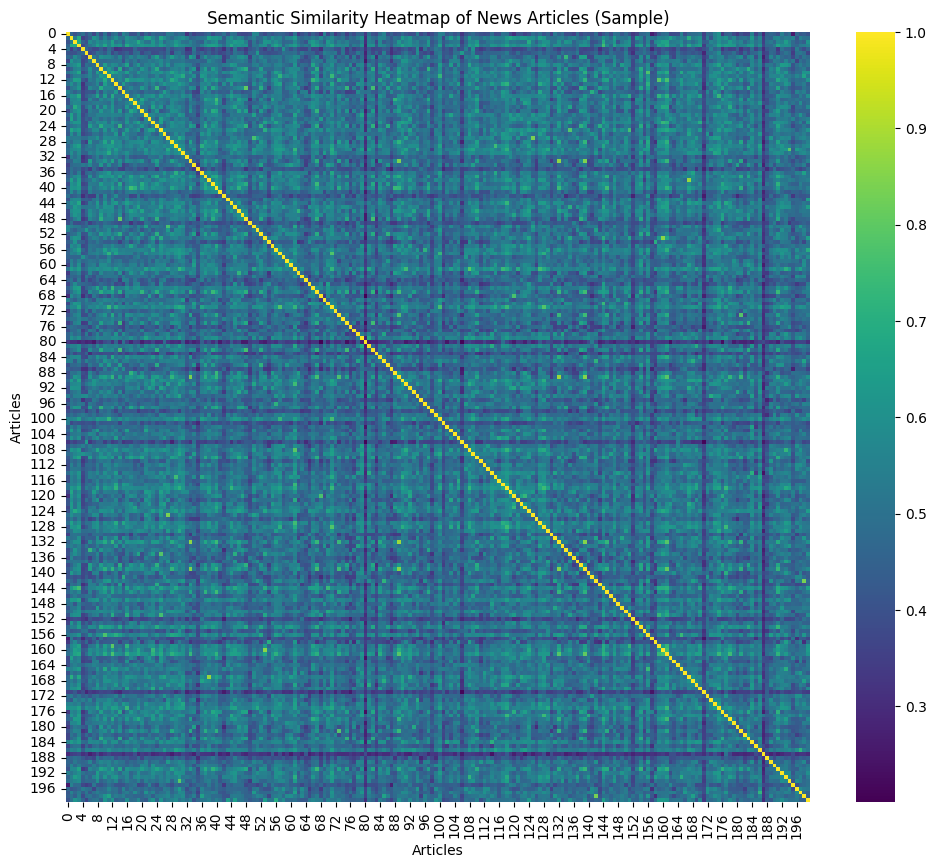

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load your embeddings DataFrame
df = pd.read_parquet("/content/news_with_embeddings_1yr.parquet")

# Optionally sample to avoid huge memory usage (e.g., 200 articles)
sample_df = df.sample(200, random_state=42)
emb_matrix = np.vstack(sample_df['embedding'].values)

# Compute cosine similarity
similarity_matrix = cosine_similarity(emb_matrix)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, cmap="viridis")
plt.title("Semantic Similarity Heatmap of News Articles (Sample)")
plt.xlabel("Articles")
plt.ylabel("Articles")
plt.show()


In [30]:
import pandas as pd
import numpy as np
import umap
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Load parquet
df = pd.read_parquet("/content/news_with_embeddings_1yr.parquet", engine="pyarrow")

# Combine title + body
df['text'] = df['title'] + " " + df['body']

# Convert embeddings to matrix
emb_matrix = np.vstack(df['embedding'].values)

# Reduce to 3D using UMAP
umap_3d = umap.UMAP(n_components=3, random_state=42)
embedding_3d = umap_3d.fit_transform(emb_matrix)

# Cluster into 9 clusters (or whatever you chose)
kmeans = KMeans(n_clusters=9, random_state=42)
df['cluster'] = kmeans.fit_predict(embedding_3d)

# --- Now TF-IDF and keywords per cluster ---
top_n = 10
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['text'])
feature_names = tfidf.get_feature_names_out()

cluster_keywords = {}

for cluster in sorted(df['cluster'].unique()):
    cluster_idx = df.index[df['cluster'] == cluster].tolist()

    if len(cluster_idx) == 0:
        continue

    cluster_texts = tfidf_matrix[cluster_idx, :]
    mean_tfidf = cluster_texts.mean(axis=0).A1
    top_indices = mean_tfidf.argsort()[::-1][:top_n]
    keywords = [feature_names[i] for i in top_indices]
    cluster_keywords[cluster] = keywords

# Display
for cluster, keywords in cluster_keywords.items():
    print(f"Cluster {cluster}: {', '.join(keywords)}")


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Cluster 0: court, said, police, judge, justice, appeal, legal, case, ruling, attorney
Cluster 1: pnm, unc, said, election, minister, party, government, young, rowley, political
Cluster 2: said, carnival, julian, morris, people, tt, competition, soca, school, children
Cluster 3: police, man, body, shot, dead, said, old, road, hospital, year
Cluster 4: tt, said, venezuela, energy, government, minister, gas, caribbean, caricom, foreign
Cluster 5: police, said, fraser, port, beach, soe, station, khan, baby, venezuela
Cluster 6: police, man, arrested, officers, old, men, victim, ammunition, car, year
Cluster 7: said, ministry, school, wasa, water, health, education, students, people, minister
Cluster 8: police, soe, said, security, officers, crime, prison, gang, public, people


these cluster keywords already give a lot of insight! Each cluster seems to represent a clear topic or theme:

Cluster 0 → Legal / court news

Cluster 1 → Politics / elections

Cluster 2 → Cultural / Carnival / events

Cluster 3 → Crime / shootings / police incidents

Cluster 4 → Energy / government / international relations

Cluster 5 → Police / local incidents / beaches / public safety

Cluster 6 → Arrests / police operations

Cluster 7 → Ministry / education / schools / health

Cluster 8 → Crime / security / gangs / prison

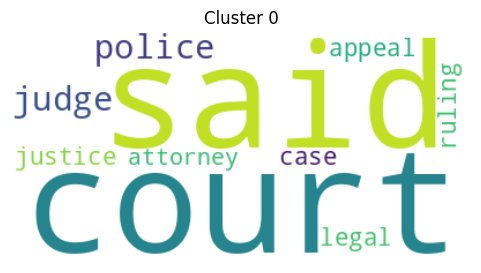

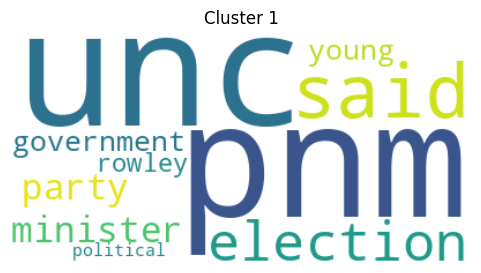

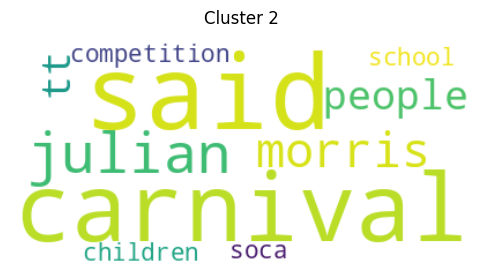

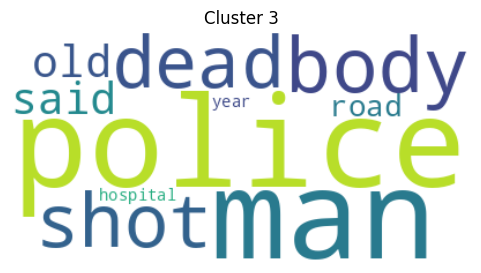

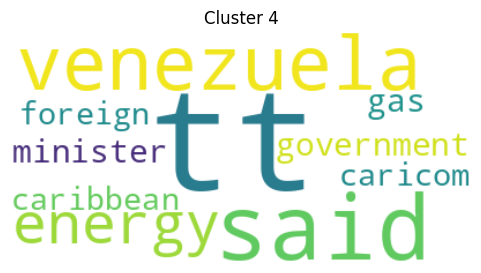

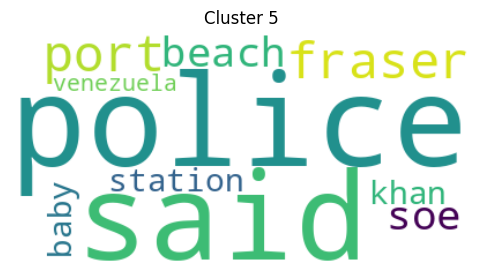

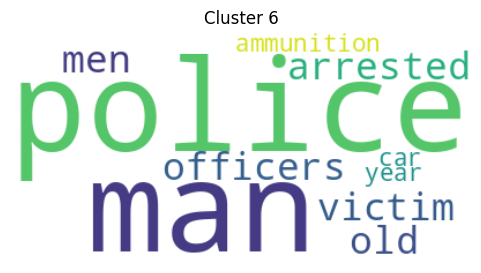

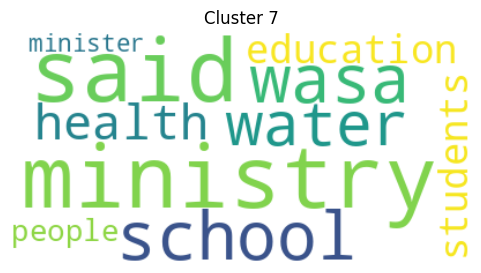

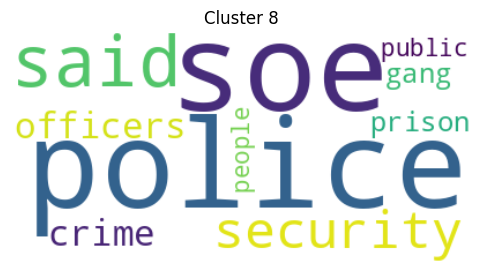

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for cluster, keywords in cluster_keywords.items():
    wc = WordCloud(width=400, height=200, background_color='white').generate(' '.join(keywords))
    plt.figure(figsize=(6,3))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster}')
    plt.show()


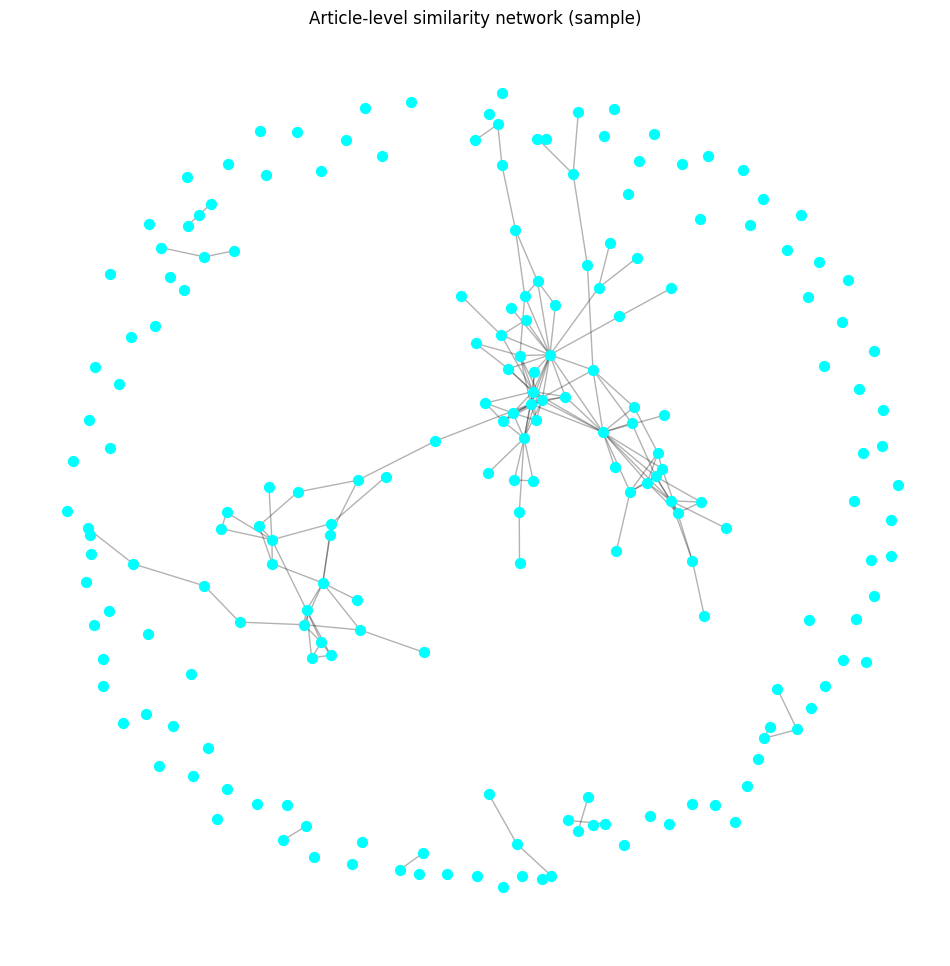

In [45]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load data
df = pd.read_parquet("/content/news_with_embeddings_1yr.parquet")

# Sample a subset of articles (e.g., 200)
sample_df = df.sample(n=200, random_state=42).reset_index(drop=True)
emb_matrix = np.vstack(sample_df['embedding'].values)

# Compute cosine similarity
sim_matrix = cosine_similarity(emb_matrix)

# Threshold to create edges (0.7 is a good starting point)
threshold = 0.7
G = nx.Graph()

# Add nodes
for idx, row in sample_df.iterrows():
    G.add_node(idx, title=row['title'], cluster=row.get('cluster', None))

# Add edges
for i in range(len(sim_matrix)):
    for j in range(i+1, len(sim_matrix)):
        if sim_matrix[i,j] > threshold:
            G.add_edge(i, j, weight=sim_matrix[i,j])

# Draw network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42, k=0.15)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='cyan')
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Article-level similarity network (sample)")
plt.axis('off')
plt.show()


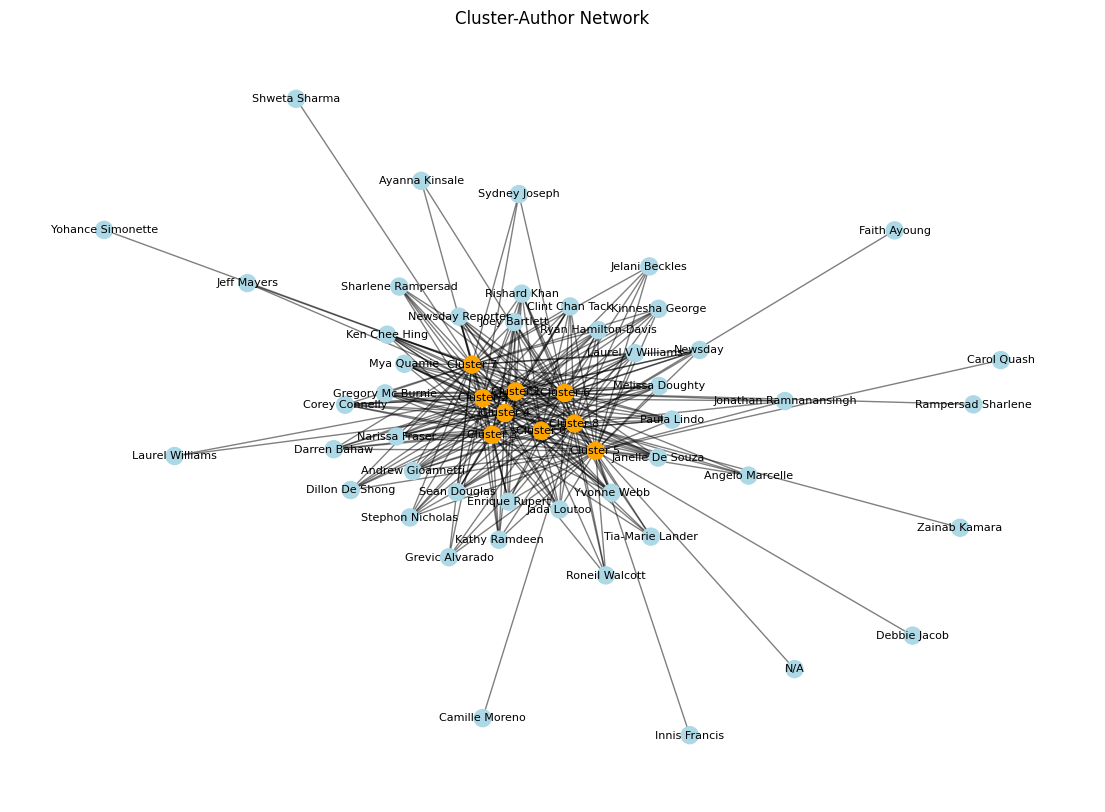

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# Ensure 'cluster' exists
if 'cluster' not in df.columns:
    from sklearn.cluster import KMeans
    emb_matrix = np.vstack(df['embedding'].values)
    kmeans = KMeans(n_clusters=9, random_state=42)
    df['cluster'] = kmeans.fit_predict(emb_matrix)

# Create bipartite graph
G = nx.Graph()

# Add clusters as nodes
clusters = df['cluster'].unique()
for c in clusters:
    G.add_node(f"Cluster {c}", type='cluster')

# Add authors as nodes
authors = df['author'].unique()
for a in authors:
    G.add_node(a, type='author')

# Add edges: author -> cluster if they wrote an article in that cluster
for c in clusters:
    cluster_authors = df[df['cluster'] == c]['author'].unique()
    for a in cluster_authors:
        G.add_edge(a, f"Cluster {c}")

# Draw network
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)
node_colors = ['orange' if G.nodes[n].get('type')=='cluster' else 'lightblue' for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=150, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Cluster-Author Network")
plt.axis('off')
plt.show()


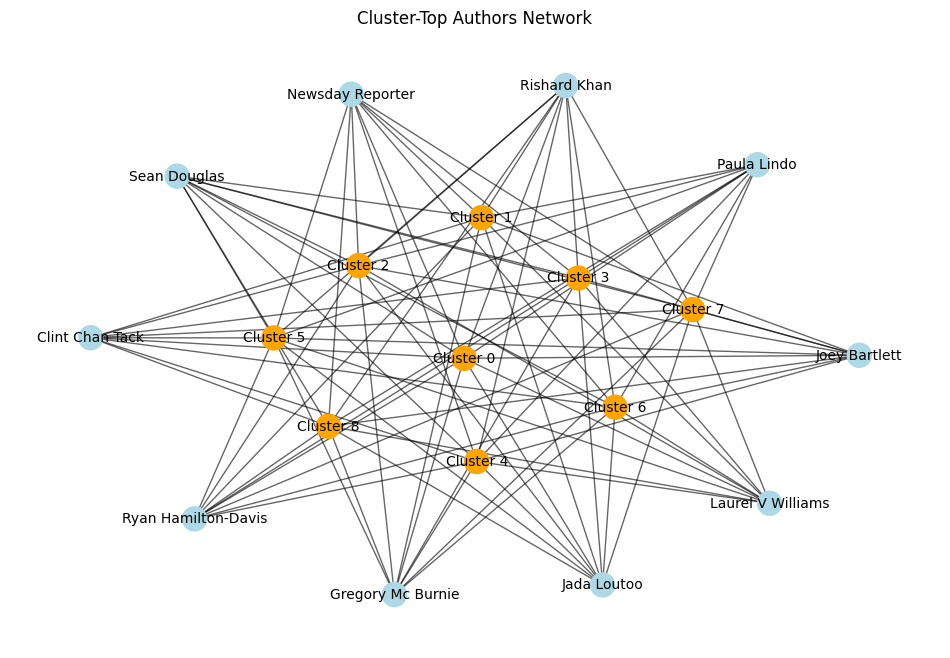

In [47]:
# Count articles per author
top_authors = df['author'].value_counts().head(10).index.tolist()

# Filter df to only top authors
df_top = df[df['author'].isin(top_authors)]

# Build cluster-author graph as before
G = nx.Graph()

# Add clusters
for c in df_top['cluster'].unique():
    G.add_node(f"Cluster {c}", type='cluster')

# Add top authors
for a in top_authors:
    G.add_node(a, type='author')

# Add edges
for c in df_top['cluster'].unique():
    cluster_authors = df_top[df_top['cluster'] == c]['author'].unique()
    for a in cluster_authors:
        G.add_edge(a, f"Cluster {c}")

# Draw
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.5, seed=42)
node_colors = ['orange' if G.nodes[n].get('type')=='cluster' else 'lightblue' for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=300, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Cluster-Top Authors Network")
plt.axis('off')
plt.show()


In [59]:
import pandas as pd
import numpy as np
import umap
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import plotly.graph_objects as go

# Load embeddings
df = pd.read_parquet("/content/news_with_embeddings_1yr.parquet")
emb_matrix = np.vstack(df['embedding'].values)

# Cluster embeddings
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(emb_matrix)
df['cluster'] = labels

# Compute cluster centroids
centroids = []
for i in range(n_clusters):
    cluster_emb = emb_matrix[df['cluster'] == i]
    centroids.append(cluster_emb.mean(axis=0))
centroids = np.vstack(centroids)

# Compute cosine similarity between cluster centroids
similarity_matrix = cosine_similarity(centroids)

# Build NetworkX graph
G = nx.Graph()
for i in range(n_clusters):
    G.add_node(i, size=(df['cluster'] == i).sum())

# Add edges for similarity above a threshold
threshold = 0.7  # adjust as needed
for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        sim = similarity_matrix[i, j]
        if sim > threshold:
            G.add_edge(i, j, weight=sim)

# Plot with Plotly
pos = nx.spring_layout(G, seed=42, dim=3)  # 3D layout

edge_x, edge_y, edge_z = [], [], []
for edge in G.edges(data=True):
    x0, y0, z0 = pos[edge[0]][0], pos[edge[0]][1], pos[edge[0]][2]
    x1, y1, z1 = pos[edge[1]][0], pos[edge[1]][1], pos[edge[1]][2]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_z += [z0, z1, None]

edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    line=dict(width=2, color='gray'),
    hoverinfo='none',
    mode='lines'
)

node_x, node_y, node_z, node_size, node_text = [], [], [], [], []
for node in G.nodes(data=True):
    x, y, z = pos[node[0]][0], pos[node[0]][1], pos[node[0]][2]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)
    node_size.append(node[1]['size']*2)  # scale node size
    node_text.append(f"Cluster {node[0]}<br>Articles: {node[1]['size']}")

node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    text=node_text,
    textposition='top center',
    marker=dict(size=node_size, color=list(range(n_clusters)), colorscale='Rainbow'),
    hoverinfo='text'
)

fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title='Cluster-level Co-occurrence Network',
    showlegend=False,
    template='plotly_dark',
    margin=dict(l=0, r=0, b=0, t=40),
    scene=dict(
        camera=dict(
            eye=dict(x=8, y=8, z=8)  # Larger values = further zoom out
        )
    )
)
fig.show()


In [51]:
import pandas as pd
import numpy as np
import networkx as nx
import plotly.graph_objects as go
import umap
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# --- Load embeddings ---
df = pd.read_parquet("/content/news_with_embeddings_1yr.parquet")
emb_matrix = np.vstack(df['embedding'].values)

# --- Cluster embeddings into 9 clusters ---
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(emb_matrix)
df['cluster'] = labels

# --- Compute cluster centroids ---
centroids = np.array([emb_matrix[df['cluster'] == i].mean(axis=0) for i in range(n_clusters)])

# --- Use UMAP to get 3D positions of clusters ---
umap_3d = umap.UMAP(n_components=3, random_state=42)
cluster_positions = umap_3d.fit_transform(centroids)
pos = {i: cluster_positions[i] for i in range(n_clusters)}

# --- Compute similarity between clusters ---
similarity = cosine_similarity(centroids)
threshold = 0.7  # only show edges for similarity above this
edges = [(i, j, similarity[i, j]) for i in range(n_clusters) for j in range(i+1, n_clusters) if similarity[i, j] > threshold]

# --- Build graph ---
G = nx.Graph()
for i in range(n_clusters):
    G.add_node(i)

for i, j, sim in edges:
    G.add_edge(i, j, weight=sim)

# --- Create 3D scatter plot for nodes ---
node_x, node_y, node_z = [], [], []
for i in G.nodes:
    x, y, z = pos[i]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)

node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    marker=dict(size=10, color=list(range(n_clusters)), colorscale='Viridis'),
    text=[f'Cluster {i}' for i in G.nodes],
    textposition='top center'
)

# --- Create edges ---
edge_x, edge_y, edge_z = [], [], []
for i, j, sim in edges:
    x0, y0, z0 = pos[i]
    x1, y1, z1 = pos[j]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(width=2, color='gray'),
)

# --- Plot ---
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="3D Cluster-level Co-occurrence Network",
    showlegend=False,
    scene=dict(
        # xaxis=dict(showbackground=False),
        # yaxis=dict(showbackground=False),
        # zaxis=dict(showbackground=False),
        xaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False), # to hide gridlines
        yaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False),
        zaxis=dict(showbackground=False, showgrid=False, showticklabels=False, zeroline=False),
        bgcolor='black'  # dark background
    ),
    paper_bgcolor='black',
    font_color='white'
)
fig.show()


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



# Narrowing the Scope of the Project

In [2]:
import pandas as pd

# Load the existing embeddings Parquet
df = pd.read_parquet("/content/news_with_embeddings_1yr.parquet")

# Inspect
print(df.head())
print(df.columns)


                                                 url  \
0  https://newsday.co.tt/2024/11/27/cops-kill-two...   
1  https://newsday.co.tt/2024/11/27/7-cops-on-mis...   
2  https://newsday.co.tt/2024/11/27/indarsingh-fo...   
3  https://newsday.co.tt/2024/11/27/mark-wants-an...   
4  https://newsday.co.tt/2024/11/27/education-min...   

                                               title           author  \
0   Cops kill two suspected car thieves in Marabella      Yvonne Webb   
1  7 cops on misbehaviour charge to reappear in c...      Jada Loutoo   
2  Indarsingh: 'Follow health, safety rules for r...      Yvonne Webb   
3  Mark wants answers on sale of Clico's methanol...     Sean Douglas   
4   Education Minister: No 'unsafe' schools reopened  Clint Chan Tack   

  category   date_iso                                               body  \
0     News 2024-11-27  MARABELLA police shot and killed two suspected...   
1     News 2024-11-27  A HIGH COURT Master has issued summonses for t...

In [4]:
import numpy as np

# Convert list of embeddings to a matrix
emb_matrix = np.vstack(df['embedding'].to_numpy())
print("Embedding matrix shape:", emb_matrix.shape)

Embedding matrix shape: (5480, 768)


In [8]:
from sklearn.cluster import KMeans

# Choose number of clusters (adjust based on your elbow/silhouette analysis)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(emb_matrix)

print(df['cluster'].value_counts())

cluster
4    1270
0    1268
3    1153
2     970
1     819
Name: count, dtype: int64


In [ ]:
import umap

reducer = umap.UMAP(n_components=2, random_state=42)
umap_2d = reducer.fit_transform(emb_matrix)

df['umap_x'] = umap_2d[:, 0]
df['umap_y'] = umap_2d[:, 1]

reducer3d = umap.UMAP(n_components=3, random_state=42)
umap_3d = reducer3d.fit_transform(emb_matrix)

df['umap_3d_x'] = umap_3d[:, 0]
df['umap_3d_y'] = umap_3d[:, 1]
df['umap_3d_z'] = umap_3d[:, 2]

df.to_parquet("data/news_last_1_year_clusters.parquet", index=False, compression="snappy")
print("Parquet file updated with clusters and UMAP coordinates!")


In [1]:
!pip uninstall cudf cuml -y  # remove GPU RAPIDS packages
!pip install --upgrade umap-learn numba==0.61.0


Loaded 5480 articles
Embedding matrix shape: (5480, 768)
Cluster counts:
 cluster
8    905
5    773
6    721
4    716
2    674
1    647
3    505
7    479
0     60
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



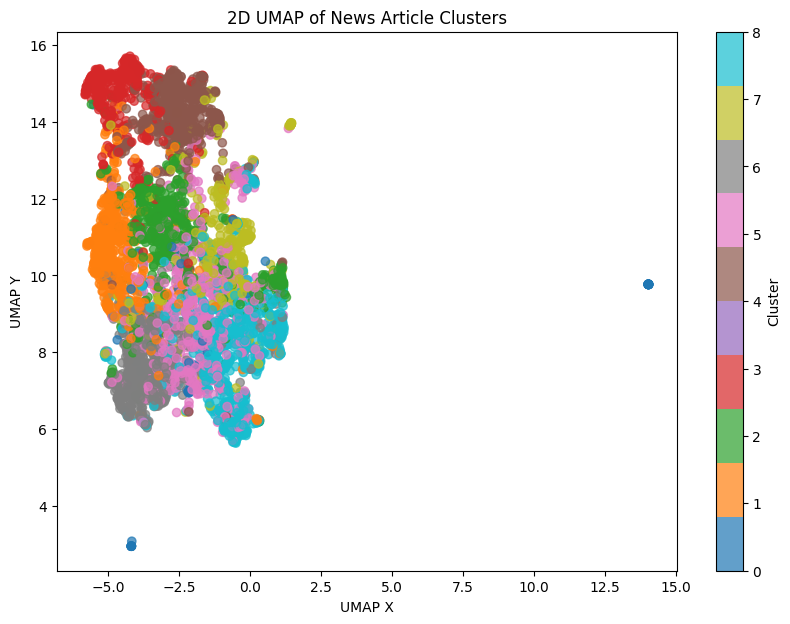

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Saved Parquet with clusters and UMAP coordinates!


In [6]:
# cluster_visualization.py
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt
import plotly.express as px

# --- 1. Load embeddings ---
df = pd.read_parquet("/content/news_with_embeddings_1yr.parquet")
print(f"Loaded {len(df)} articles")

emb_matrix = np.vstack(df['embedding'].to_numpy())
print("Embedding matrix shape:", emb_matrix.shape)

# --- 2. Cluster embeddings ---
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(emb_matrix)
print("Cluster counts:\n", df['cluster'].value_counts())

# --- 3. UMAP for 2D visualization ---
reducer_2d = umap.UMAP(n_components=2, random_state=42)
umap_2d = reducer_2d.fit_transform(emb_matrix)
df['umap_x'] = umap_2d[:, 0]
df['umap_y'] = umap_2d[:, 1]

# 2D scatter plot (matplotlib)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['umap_x'], df['umap_y'], c=df['cluster'], cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title("2D UMAP of News Article Clusters")
plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")
plt.show()

# --- 4. UMAP for 3D visualization ---
reducer_3d = umap.UMAP(n_components=3, random_state=42)
umap_3d = reducer_3d.fit_transform(emb_matrix)
df['umap_3d_x'] = umap_3d[:, 0]
df['umap_3d_y'] = umap_3d[:, 1]
df['umap_3d_z'] = umap_3d[:, 2]

# 3D scatter plot (Plotly)
fig = px.scatter_3d(
    df,
    x='umap_3d_x',
    y='umap_3d_y',
    z='umap_3d_z',
    color='cluster',
    hover_data=['title', 'author'],
    title="3D UMAP of News Article Clusters"
)
fig.show()

# --- 5. Save updated Parquet with cluster info ---
df.to_parquet("news_last_1_year_clusters.parquet", index=False, compression="snappy")
print("Saved Parquet with clusters and UMAP coordinates!")


Loaded 5480 rows | Embedding matrix shape: (5480, 768)

 Running version: raw
Cluster counts:
 cluster
8    871
5    766
6    691
2    658
4    657
1    640
7    483
9    394
3    260
0     60
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



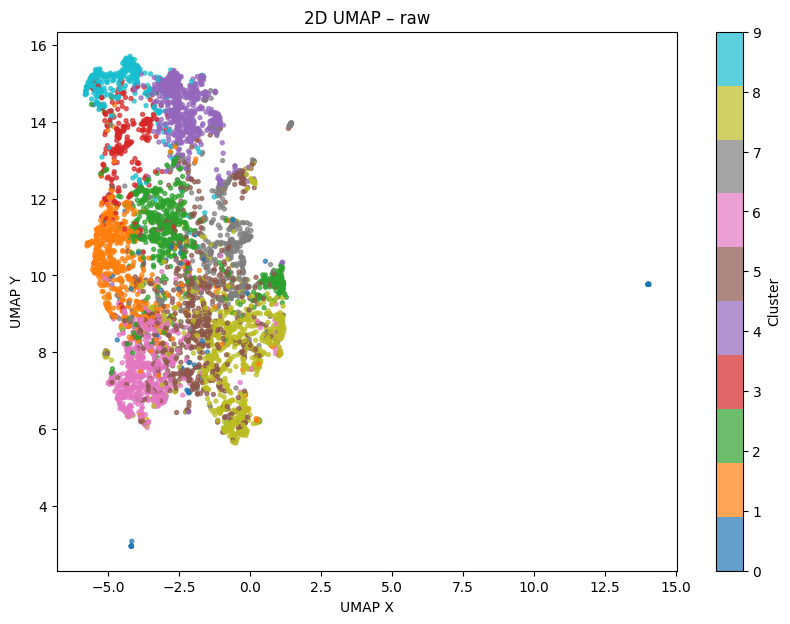


Removing extreme outliers...
Kept 5424 after outlier removal

 Running version: clean
Cluster counts:
 cluster
8    721
3    684
7    629
1    570
2    557
4    546
6    483
9    443
0    413
5    378
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



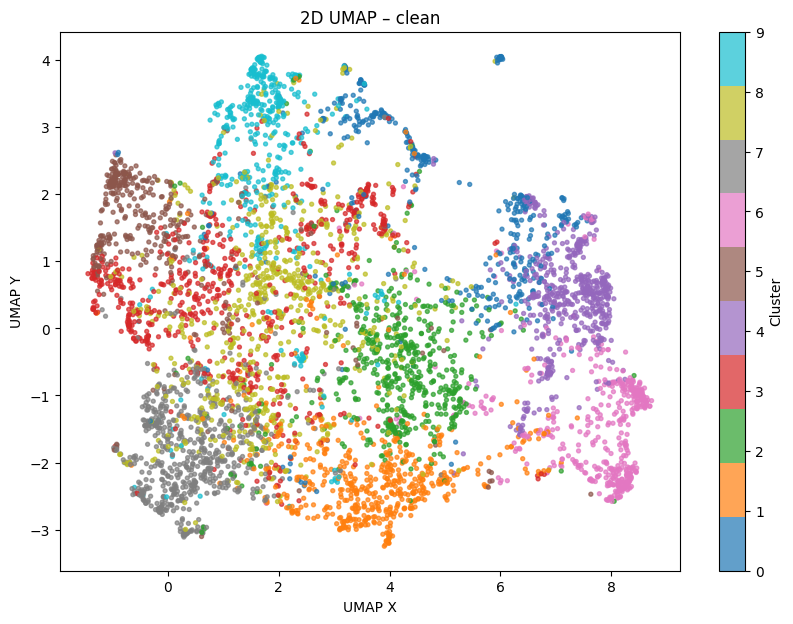


 Running version: normalized
Cluster counts:
 cluster
3    689
7    654
5    602
2    598
4    591
0    535
6    481
8    471
1    464
9    395
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



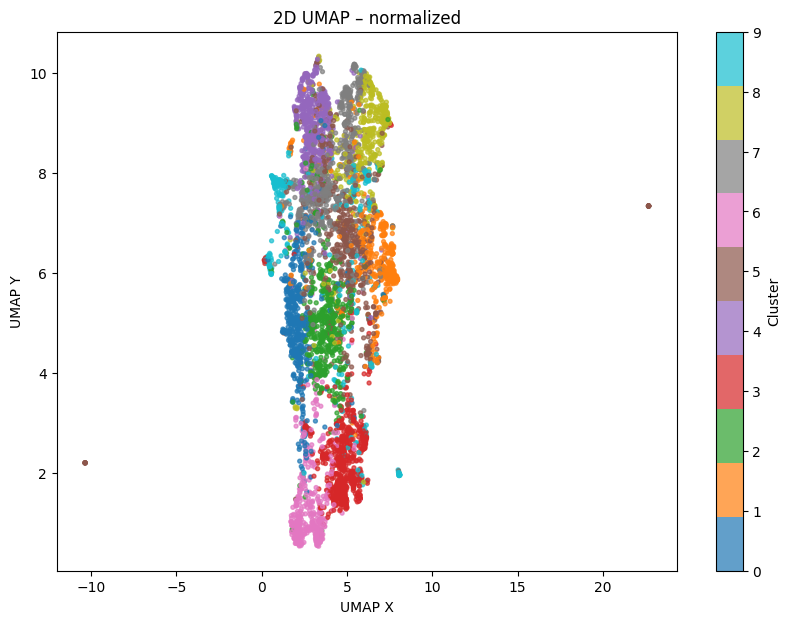

In [5]:
# cluster_visualization_functions.py
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import plotly.express as px

# ------------------------------------------------
# 1. LOAD EMBEDDINGS
# ------------------------------------------------
def load_embeddings(path):
    df = pd.read_parquet(path)
    emb = np.vstack(df['embedding'].to_numpy())
    print(f"Loaded {len(df)} rows | Embedding matrix shape: {emb.shape}")
    return df, emb


# ------------------------------------------------
# 2. KMEANS CLUSTERING
# ------------------------------------------------
def cluster_embeddings(df, emb_matrix, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(emb_matrix)
    print("Cluster counts:\n", df['cluster'].value_counts())
    return df


# ------------------------------------------------
# 3. UMAP REDUCTION
# ------------------------------------------------
def run_umap(emb_matrix, n_components=2):
    reducer = umap.UMAP(n_components=n_components, random_state=42)
    reduced = reducer.fit_transform(emb_matrix)
    return reduced


# ------------------------------------------------
# 4. PLOTS
# ------------------------------------------------

def plot_2d(df, x_col, y_col, title):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(df[x_col], df[y_col], c=df['cluster'],
                          cmap='tab10', alpha=0.7, s=8)
    plt.colorbar(scatter, label="Cluster")
    plt.title(title)
    plt.xlabel("UMAP X")
    plt.ylabel("UMAP Y")
    plt.show()


def plot_3d(df, x_col, y_col, z_col, title):
    fig = px.scatter_3d(
        df,
        x=x_col,
        y=y_col,
        z=z_col,
        color="cluster",
        hover_data=['title', 'author'],
        title=title
    )
    fig.show()


# ------------------------------------------------
# 5. FULL PROCESS FOR ONE VERSION
# ------------------------------------------------

def process_version(df, emb_matrix, version_name):
    print("\n==============================")
    print(f" Running version: {version_name}")
    print("==============================")

    # ---- Cluster
    df = cluster_embeddings(df, emb_matrix)

    # ---- UMAP 2D
    umap_2d = run_umap(emb_matrix, n_components=2)
    df[f'{version_name}_umap_x'] = umap_2d[:, 0]
    df[f'{version_name}_umap_y'] = umap_2d[:, 1]

    # ---- UMAP 3D
    umap_3d = run_umap(emb_matrix, n_components=3)
    df[f'{version_name}_umap_3d_x'] = umap_3d[:, 0]
    df[f'{version_name}_umap_3d_y'] = umap_3d[:, 1]
    df[f'{version_name}_umap_3d_z'] = umap_3d[:, 2]

    # ---- Show plots
    plot_2d(df, f'{version_name}_umap_x', f'{version_name}_umap_y',
            f"2D UMAP – {version_name}")
    plot_3d(df, f'{version_name}_umap_3d_x', f'{version_name}_umap_3d_y',
            f'{version_name}_umap_3d_z',
            f"3D UMAP – {version_name}")

    return df


# ------------------------------------------------
# 6. MAIN EXECUTION
# ------------------------------------------------
if __name__ == "__main__":
    path = "/content/news_with_embeddings_1yr.parquet"

    # Load original
    df_orig, emb_orig = load_embeddings(path)

    # ------------------------------------------------
    # Version 1 — ORIGINAL RAW EMBEDDINGS
    # ------------------------------------------------
    df_orig = process_version(df_orig.copy(), emb_orig, version_name="raw")

    # ------------------------------------------------
    # Version 2 — REMOVE EXTREME OUTLIERS (simple z-score method)
    # ------------------------------------------------
    print("\nRemoving extreme outliers...")
    zscores = np.abs((emb_orig - emb_orig.mean(axis=0)) / emb_orig.std(axis=0))
    mask = (zscores < 5).all(axis=1)   # keep rows where all dims < 5 std
    df_no_outliers = df_orig[mask].copy()
    emb_no_outliers = emb_orig[mask]
    print(f"Kept {len(df_no_outliers)} after outlier removal")

    df_no_outliers = process_version(df_no_outliers, emb_no_outliers,
                                     version_name="clean")

    # ------------------------------------------------
    # Version 3 — NORMALIZED EMBEDDINGS
    # ------------------------------------------------
    scaler = StandardScaler()
    emb_norm = scaler.fit_transform(emb_orig)

    df_norm = process_version(df_orig.copy(), emb_norm,
                              version_name="normalized")

    # ------------------------------------------------
    # Save at the end if you want
    # ------------------------------------------------
    # df_orig.to_parquet("data/full_cluster_versions.parquet", index=False)
    # print("Saved combined parquet!")


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json

# --- 1. Load dataset with clusters ---
df = pd.read_parquet("/content/news_last_1_year_clusters.parquet")

# Combine title + body
df['text'] = df['title'] + " " + df['body']

# --- 2. Compute TF-IDF once ---
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['text'])
feature_names = tfidf.get_feature_names_out()

# --- 3. Calculate top 100 keywords per cluster ---
cluster_keywords = {}
top_n = 100

for cluster in sorted(df['cluster'].unique()):
    cluster_idx = df.index[df['cluster'] == cluster].tolist()
    cluster_texts = tfidf_matrix[cluster_idx, :]
    mean_tfidf = cluster_texts.mean(axis=0).A1
    top_indices = mean_tfidf.argsort()[::-1][:top_n]
    keywords = [feature_names[i] for i in top_indices]
    cluster_keywords[int(cluster)] = keywords  # Convert key to regular Python int

# --- 4. Save to disk ---
with open("cluster_keywords_100.json", "w") as f:
    json.dump(cluster_keywords, f, indent=2)

print("Saved top 100 keywords per cluster!")


Saved top 100 keywords per cluster!


In [11]:
# add_umap_to_parquet.py
import pandas as pd
import numpy as np
import umap

# --- 1. Load dataset ---
df = pd.read_parquet("/content/news_last_1_year_clusters.parquet")
print(f"Loaded {len(df)} articles")

# --- 2. Convert embeddings to matrix ---
emb_matrix = np.vstack(df['embedding'].values)
print("Embedding matrix shape:", emb_matrix.shape)

# --- 3. Compute 2D UMAP ---
reducer_2d = umap.UMAP(n_components=2, random_state=42)
umap_2d = reducer_2d.fit_transform(emb_matrix)
df['umap_x'] = umap_2d[:, 0]
df['umap_y'] = umap_2d[:, 1]

# --- 4. Compute 3D UMAP ---
reducer_3d = umap.UMAP(n_components=3, random_state=42)
umap_3d = reducer_3d.fit_transform(emb_matrix)
df['umap_3d_x'] = umap_3d[:, 0]
df['umap_3d_y'] = umap_3d[:, 1]
df['umap_3d_z'] = umap_3d[:, 2]

# --- 5. Save updated Parquet ---
df.to_parquet("/content/news_last_1_year_clusters_umap.parquet", index=False, compression="snappy")
print("Saved Parquet with 2D and 3D UMAP coordinates!")


Loaded 5480 articles
Embedding matrix shape: (5480, 768)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Saved Parquet with 2D and 3D UMAP coordinates!
